<a href="https://colab.research.google.com/github/fitrianamasruroh/cnn/blob/cnn%2Fface_shape/n_fold_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load modules
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
import pandas as pd 
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)

In [ ]:
# Load dataset
df = pd.read_csv(r"/content/sample_data/tenaga.csv")

# Split into training data and test data
X = df[['Usia','Pendidikan','Tinggi Badan','Tes_Sehat','Pengalaman']]
y = df['Kelayakan']

#X = df.iloc[:, [1, 2, 3, 4]].values
#y = df.iloc[:, 5].values

# Create training and testing vars, It’s usually around 80/20 or 70/30.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
df.head()

,No,Nama,Usia,Pendidikan,Tinggi Badan,Tes_Sehat,Pengalaman,Kelayakan
0,1,Dwi Ega W,19,2,145,1,1,Tidak Layak
1,2,Denni M,22,3,155,1,1,Layak
2,3,Endang S,30,1,160,0,1,Tidak Layak
3,4,Irma O,28,4,157,1,0,Layak
4,5,Anisa D,27,1,156,1,0,Tidak Layak


In [ ]:
df["Species"] = df["Species"].replace(["Iris-setosa"], "0")
df["Species"] = df["Species"].replace(["Iris-virginica"], "1")
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   No            14 non-null     int64 
 1   Nama          14 non-null     object
 2   Usia          14 non-null     int64 
 3   Pendidikan    14 non-null     int64 
 4   Tinggi Badan  14 non-null     int64 
 5   Tes_Sehat     14 non-null     int64 
 6   Pengalaman    14 non-null     int64 
 7   Kelayakan     14 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.0+ KB


In [ ]:
df.describe()

,No,Usia,Pendidikan,Tinggi Badan,Tes_Sehat,Pengalaman,Kelayakan
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,7.5000,24.428571,2.714286,158.571429,0.928571,0.642857,0.642857
std,4.1833,4.767103,0.913874,6.824326,0.267261,0.497245,0.497245
min,1.0000,19.000000,1.000000,145.000000,0.000000,0.000000,0.000000
25%,4.2500,20.250000,2.250000,155.000000,1.000000,0.000000,0.000000
50%,7.5000,24.000000,3.000000,156.500000,1.000000,1.000000,1.000000
75%,10.7500,27.000000,3.000000,160.000000,1.000000,1.000000,1.000000
max,14.0000,35.000000,4.000000,173.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6524bd5c50>,
      dtype=object)

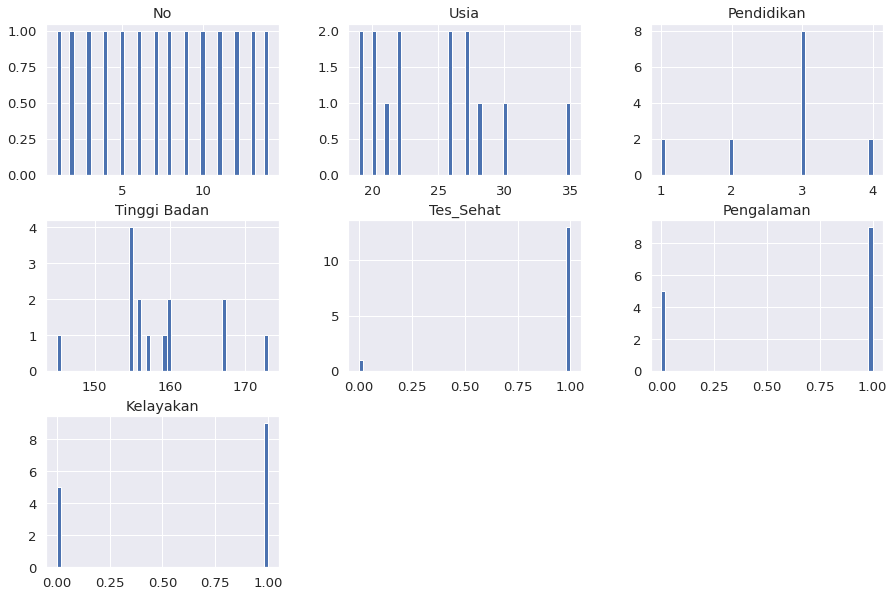

In [ ]:
df.hist(bins=50, figsize=(15,10))

In [ ]:
# Now we’ll fit the model on the training data
model = SVC(gamma='auto')
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model = SVC(kernel = 'linear', random_state = 0, gamma=.01, C=1) 
model.fit(X_train, Y_train) 


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
model = SVC(kernel='poly', degree=3, C=1.0, gamma = 'auto') 
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Make predictions on validation dataset
predictions = model.predict(X_test)

In [ ]:
# Applying k-Fold Cross Validation 
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10)

In [ ]:
accuracies

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std()))

1.00 accuracy with a standard deviation of 0.00


In [ ]:
# Making the Confusion Matrix 
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

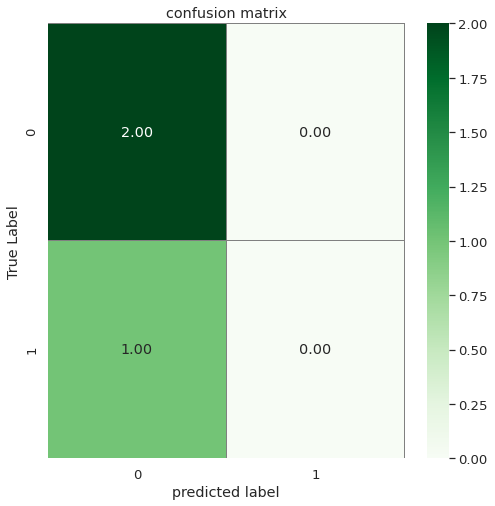

In [ ]:
confusion_mtx = confusion_matrix(Y_test, predictions)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, predictions))

Classifiction Report :
              precision    recall  f1-score   support

       Layak       0.67      1.00      0.80         2
 Tidak Layak       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: ignored

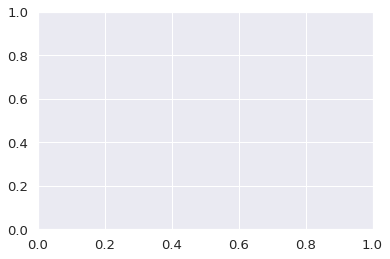

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    
    viz = plot_roc_curve(model, X_test, Y_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

In [ ]:
2# Pickle model 
pd.to_pickle(model,r'/content/sample_data/model.pickle')

# Unpickle model 
model = pd.read_pickle(r'/content/sample_data/model.pickle') 
# read a pickle pd.read_pickle('model.pkl')

# Take input from user
sepal_length = float(input("Enter sepal_length: "))
sepal_width = float(input("Enter sepa_width: "))
petal_length = float(input("Enter petal_length: "))
petal_width = float(input("Enter petal_width: "))

result = model.predict([[sepal_length,sepal_width,petal_length,petal_width]])  # input must be 2D array
print(result)

Enter sepal_length: 1
Enter sepa_width: 1
Enter petal_length: 1
Enter petal_width: 1
['Iris-setosa']


In [ ]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 10)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

array([-2.        , -1.75510204, -1.51020408, -1.26530612, -1.02040816,
       -0.7755102 , -0.53061224, -0.28571429, -0.04081633,  0.20408163,
        0.44897959,  0.69387755,  0.93877551,  1.18367347,  1.42857143,
        1.67346939,  1.91836735,  2.16326531,  2.40816327,  2.65306122,
        2.89795918,  3.14285714,  3.3877551 ,  3.63265306,  3.87755102,
        4.12244898,  4.36734694,  4.6122449 ,  4.85714286,  5.10204082,
        5.34693878,  5.59183673,  5.83673469,  6.08163265,  6.32653061,
        6.57142857,  6.81632653,  7.06122449,  7.30612245,  7.55102041,
        7.79591837,  8.04081633,  8.28571429,  8.53061224,  8.7755102 ,
        9.02040816,  9.26530612,  9.51020408,  9.75510204, 10.        ])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


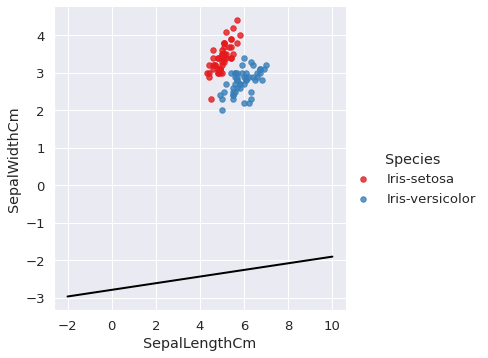

In [ ]:
import seaborn as sns; sns.set(font_scale=1.2)
sns.lmplot('SepalLengthCm','SepalWidthCm', data=df, hue='Species',palette='Set1', fit_reg=False, scatter_kws={"s": 30});
plt.plot(xx, yy, linewidth=2, color='black');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


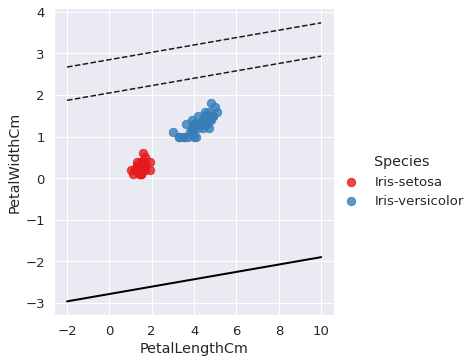

In [ ]:
# Look at the margins and support vectors
sns.lmplot('PetalLengthCm', 'PetalWidthCm', data=df, hue='Species', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');